# Análise de Dados - Insurance Claim

Para a realização das análises usarei as seguintes bibliotecas:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

A variável que conterá o DataFrame dos dados será chamada de **insurance**:

In [3]:
insurance = pd.read_csv('insurance_claim.csv')

Abaixo está um resumo dos dados incluidos no dataset usado:

In [4]:
insurance.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,LOCALITY,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,yes,after 2015,no,yes,New York,12000.0,sedan,0,0,0,approved
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,no,before 2015,no,no,New York,16000.0,sedan,0,0,0,denied
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,yes,before 2015,no,no,New York,11000.0,sedan,0,0,0,approved
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,yes,before 2015,no,yes,Miami,11000.0,sedan,0,0,0,approved
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,yes,before 2015,no,no,Miami,12000.0,sedan,2,0,1,denied


## Análise de features

Na análise de features irei analisar cada uma das variáveis do banco de dados (exceto a variável **outcome**), refletindo a respeito de suas distribuições e correlações para tentar inferir teorias a respeito dos seguros de carros.

### Idade

Primeiramente, interessa-me saber qual é a faixa de idade em que mais ocorrem casos de pedidos de indenização, e para isso usarei o método <font color='skyblue'>filter()</font> para correlacionar os <font color='yellow'>ID's</font> com as <font color='yellow'>idades</font>, pois assim será possível contabilizar a quantidade de casos em que determinada faixa de idade aparece.

Em seguida, o método <font color='skyblue'>.groupby()</font> é usado para ordenar os dados pelas idades

Finalizando, o método <font color='skyblue'>.count()</font> é usado para contabilizar os dados relacionados ao groupby (as idades)

In [5]:
insurance.filter(['AGE', 'ID']).groupby('AGE').count()

,ID
AGE,
16-25,2016
26-39,3063
40-64,2931
65+,1990


Observando a tabela, percebemos que a faixa de idade em que mais ocorrem pedidos de indenização é por volta dos dos 26-39 anos. Mas vale notar também que a quantidade de casos é semelhante à faixa dos 40-64 anos, mostrando que eventuais danos ao veículo ocorrem mais tarde na vida do motorista. 

Algumas explicações possíveis são devido à vida-útil do automóvel (em casos de descuido da mecânica do veículo), estresse no trabalho do indivíduo... até mesmo crise de meia-idade (como por exemplo comprar carros caros e então ser roubado), dentre outras explicações. 

Um fato a ser observado também é que a faixa em que ocorrem menos pedidos de indenização é de 65 anos pra cima, que é a idade da aposentadoria do indivíduo, indicando que pessoas mais velhas tendem a dirigir menos, talvez devido ao agravamento de doenças que dificultem a atividade, como por exemplo a síndrome de Parkinson.

### Gênero

Para verificar a variabilidade de dados em relação ao gênero, irei usar o mesmo método utilizado na análise das <font color=yellow>idades</fonts>:

In [6]:
insurance.filter(['GENDER', 'ID']).groupby('GENDER').count()

,ID
GENDER,
female,5010
male,4990


Podemos verificar que os dados estão igualitariamente distribuidos entre os <font color=yellow>gêneros</font>, portanto não é possível inferirmos alguma afirmação quanto a esses dados individualmente. 

### Etnia

Na análise das etnias o gráfico mostrará a diferença de distribuição entre a etnia majoritária e a etnia minoritária:

,ID
RACE,
majority,9012
minority,988


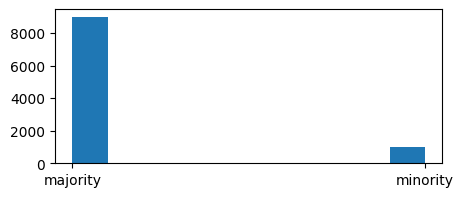

In [64]:
insurance['RACE'].hist(grid=False, figsize=(5, 2))
insurance.filter(['RACE', 'ID']).groupby('RACE').count()

Vendo tanto pelo gráfico pela tabela, podemos ver que a etnia majoritária aparece cerca de 9 vezes mais do que a minoritária.

### Experiência em dirigir

Ao analisarmos a quantidade de pedidos de indenização pela experiência em dirigir do motorista, observamos que conforme o indivíduo tem mais experiência, menos acidentes acontecem. Como mostra o gráfico abaixo:

<Axes: >

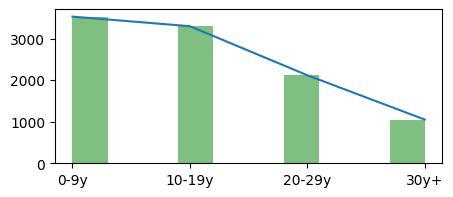

In [70]:
insurance['DRIVING_EXPERIENCE'].hist(color='green', alpha=0.5, grid=False, figsize=(5, 2)) #Gráfico de barra

af = insurance['DRIVING_EXPERIENCE'].value_counts() #Gráfico de linha
af.plot.line()